# **Biomedical EDA Notebook**

**Dataset:** `synthetic_biomedical_data.csv`

**Importing Libraries and Reading Dataset**

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#read dataset
df = pd.read_csv('synthetic_biomedical_data.csv')

**Load Dataset**


In [5]:
df

,PatientID,HbA1c,BP_systolic
0,1,6.40,127.4
1,2,5.89,127.9
2,3,6.52,138.8
3,4,7.22,141.9
4,5,5.81,98.4
...,...,...,...
195,196,6.31,114.5
196,197,5.29,90.8
197,198,6.12,140.9
198,199,6.05,118.5


**Check Columns**

In [6]:
df.columns

Index(['PatientID', 'HbA1c', 'BP_systolic'], dtype='object')

**Check Data Types**

In [7]:
df.dtypes

PatientID        int64
HbA1c          float64
BP_systolic    float64
dtype: object

**Check Null Values**

In [8]:
df.isna().sum()

PatientID      0
HbA1c          0
BP_systolic    0
dtype: int64

# **Exploratory Data Analysis**

**Descriptive Statistics**

In [9]:
#rounded by 2 digits
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
PatientID,200.0,100.5,57.9,1.0,50.8,100.5,150.2,200.0
HbA1c,200.0,6.0,0.7,4.5,5.4,6.0,6.4,8.2
BP_systolic,200.0,121.1,15.6,67.0,110.1,121.2,130.7,180.0


**Calculate the Correlation Between the Two Markers**

In [10]:
df['HbA1c'].corr(df['BP_systolic']).round(2)

np.float64(0.32)

**Categorize Using Clinical Thresholds**

In [11]:
def categorize_hba1c(x):
    if x < 5.7: return 'Normal'
    elif x<6.5: return 'Prediabetes'
    else: return 'Diabetes'

def categorize_bp(x):
    if x < 120: return 'Normal'
    elif x < 130: return 'Elevated'
    elif x < 140: return 'Hypertension Stage 1'
    else: return 'Hypertension Stage 2'

df['HbA1c_cat'] = df['HbA1c'].apply(categorize_hba1c)
df['BP_cat'] = df['BP_systolic'].apply(categorize_bp)

**Category Counts**

In [12]:
#hba1c count and %
hba_counts = df['HbA1c_cat'].value_counts().reindex(['Normal','Prediabetes','Diabetes']).fillna(0).astype(int)
hba_perc = (hba_counts / len(df) * 100).round(0)
print(hba_perc)

HbA1c_cat
Normal         36.0
Prediabetes    42.0
Diabetes       22.0
Name: count, dtype: float64


In [13]:
#BP count and %
bp_counts = df['BP_cat'].value_counts().reindex(['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2']).fillna(0).astype(int)
bp_perc = (bp_counts / len(df) * 100).round(1)
print(bp_perc)

BP_cat
Normal                  47.0
Elevated                25.0
Hypertension Stage 1    17.5
Hypertension Stage 2    10.5
Name: count, dtype: float64


**Cross-Tabulation**

In [14]:
ct = pd.crosstab(df['HbA1c_cat'], df['BP_cat'], normalize='index') * 100 
ct = ct.round(1)
print(ct)

BP_cat       Elevated  Hypertension Stage 1  Hypertension Stage 2  Normal
HbA1c_cat                                                                
Diabetes         33.3                  17.8                  15.6    33.3
Normal           20.8                  11.1                   5.6    62.5
Prediabetes      24.1                  22.9                  12.0    41.0


# **Visualizations**

**HbA1c distribution + boxplot**

In [15]:
sns.set(style='whitegrid')

**HbA1c distribution + boxplot**

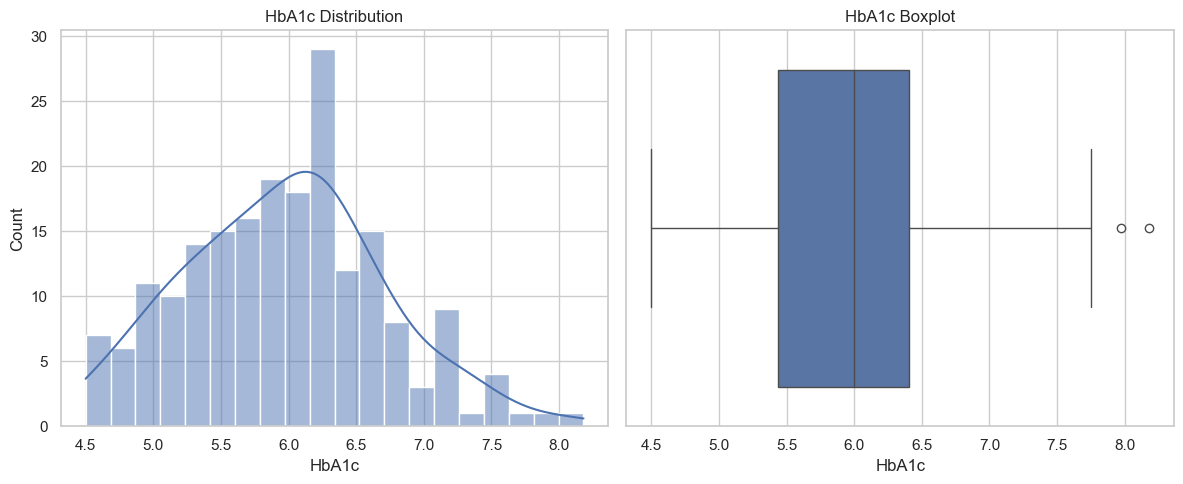

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x="HbA1c", kde=True, bins=20)
plt.title("HbA1c Distribution")
plt.subplot(1,2,2)
sns.boxplot(data=df, x="HbA1c")
plt.title("HbA1c Boxplot")
plt.tight_layout()
plt.savefig('images/HbA1c_distribution_boxplot.png', dpi=200, bbox_inches='tight')
plt.close()
print("Saved images/HbA1c_distribution_boxplot.png")

**BP distribution + boxplot**

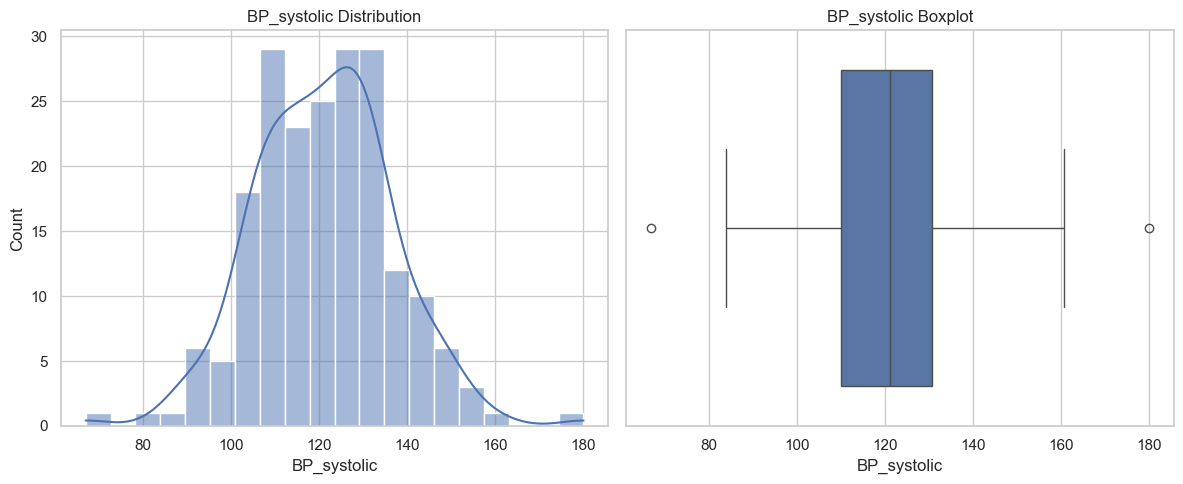

In [31]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x="BP_systolic", kde=True, bins=20)
plt.title("BP_systolic Distribution")
plt.subplot(1,2,2)
sns.boxplot(data=df, x="BP_systolic")
plt.title("BP_systolic Boxplot")
plt.tight_layout()
plt.savefig('images/BP_systolic_distribution_boxplot.png', dpi=200, bbox_inches='tight')
plt.close()
print("Saved images/BP_systolic_distribution_boxplot.png")

**HbA1c vs BP_systolic**

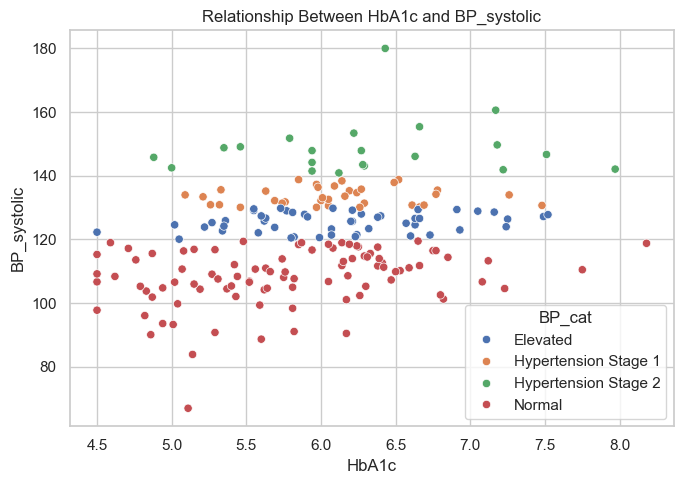

In [38]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="HbA1c", y="BP_systolic", hue='BP_cat')
plt.title("Relationship Between HbA1c and BP_systolic")
plt.tight_layout()
plt.savefig('images/hba1c_vs_bp_scatter.png', dpi=200, bbox_inches='tight')
plt.close()
print("Saved images/hba1c_vs_bp_scatter.png")

**Category Counts**

C:\Users\leila\AppData\Local\Temp\ipykernel_15812\2540422927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HbA1c_cat', order=['Normal','Prediabetes','Diabetes'], palette="coolwarm")
C:\Users\leila\AppData\Local\Temp\ipykernel_15812\2540422927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='BP_cat', order=['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2'], palette="coolwarm")


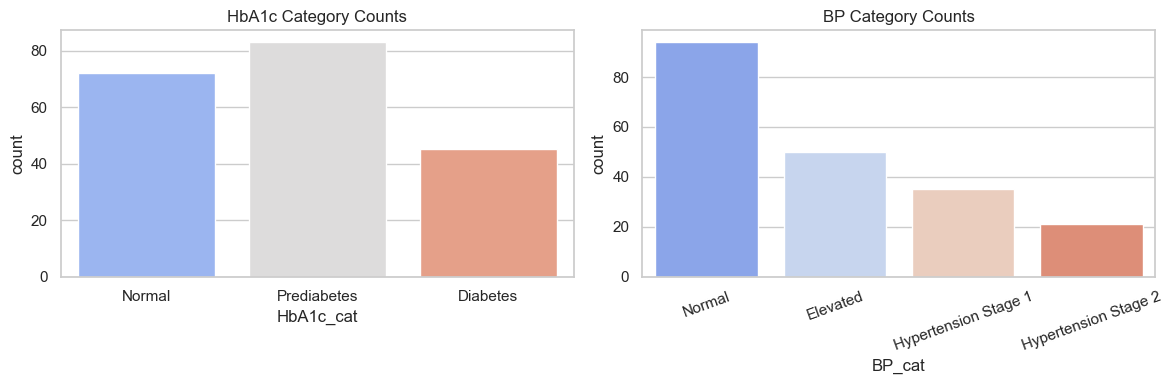

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=df, x='HbA1c_cat', order=['Normal','Prediabetes','Diabetes'], palette="coolwarm")
plt.title('HbA1c Category Counts')
plt.subplot(1,2,2)
sns.countplot(data=df, x='BP_cat', order=['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2'], palette="coolwarm")
plt.title('BP Category Counts')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig('images/category_counts.png', dpi=200, bbox_inches='tight')
plt.close()
print("Saved images/category_counts.png")

**Cross-tabulation: HbA1c vs BP (%)**

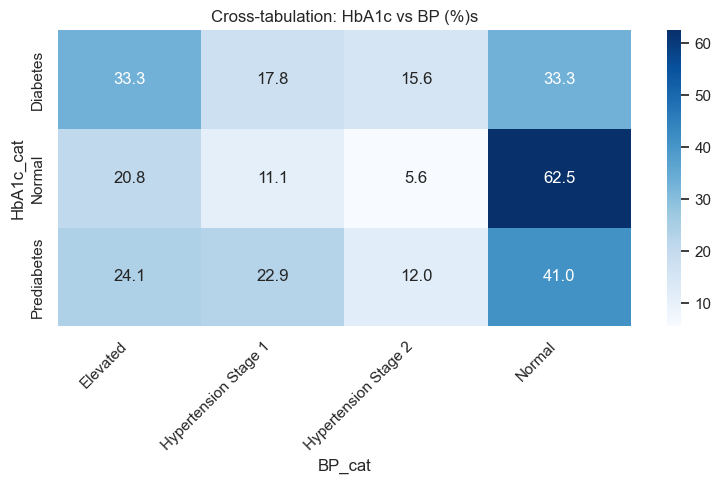

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(ct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Cross-tabulation: HbA1c vs BP (%)s")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('images/hba1c_bp_crosstab_heatmap.png', dpi=200, bbox_inches='tight')
plt.close()
print("Saved images/hba1c_bp_crosstab_heatmap.png")
